# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_combined = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_data_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice.
mouse_count = len(mouse_data_combined["Mouse ID"].unique())
mouse_count

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_data_combined.loc[mouse_data_combined.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_combined[mouse_data_combined['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_data_combined[mouse_data_combined["Mouse ID"].isin(mouse_duplicates)==False]
mouse_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = len(mouse_clean['Mouse ID'].unique())
mouse_clean_count

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_groups = mouse_data_combined.groupby(['Drug Regimen'])
drug_groups

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = drug_groups["Tumor Volume (mm3)"].mean()
drug_median = drug_groups["Tumor Volume (mm3)"].median()
drug_variance = drug_groups["Tumor Volume (mm3)"].var()
drug_std = drug_groups["Tumor Volume (mm3)"].std()
drug_sem = drug_groups["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
drug_table = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median, 'Variance': drug_variance, 'Standard Deviation': drug_std, 'SEM': drug_sem})
drug_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

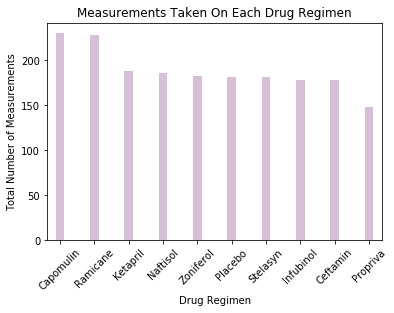

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = mouse_clean["Drug Regimen"].value_counts()
x_axis = measurements.index
y_axis = measurements.values

#bar chart
measurements.plot(kind="bar", width = .25, color = "thistle")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.title ("Measurements Taken On Each Drug Regimen")
plt.xticks(rotation = 45)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

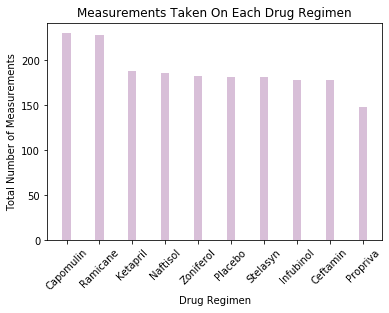

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
measurements = mouse_clean["Drug Regimen"].value_counts()
x_axis = measurements.index
y_axis = measurements.values

#bar chart
plt.bar(x_axis, y_axis, width = .25, color = "thistle") 
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.title ("Measurements Taken On Each Drug Regimen")
plt.xticks(rotation = 45)
plt.show

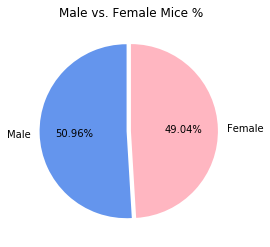

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#obtain gender count
gender = mouse_clean["Sex"].value_counts()

#variables
sex = gender.index
gender_count = gender.values

#pie chart
gender.plot(kind="pie", explode=explode, colors=colors, startangle=90, autopct="%1.2f%%")
plt.title("Male vs. Female Mice %")
plt.ylabel(" ")

#pie chart formatting 
explode = [0.05, 0]
colors = ["cornflowerblue", "lightpink"]

plt.show()

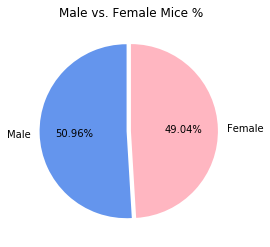

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#obtain gender count
gender = mouse_clean["Sex"].value_counts()

#variables
sex = gender.index
gender_count = gender.values

#pie chart
plt.pie(gender, labels=sex, colors=colors, explode=explode, startangle=90, autopct="%1.2f%%")
plt.title("Male vs. Female Mice %")

#pie chart formatting 
explode = [0.05, 0]
colors = ["cornflowerblue", "lightpink"]

plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = mouse_clean.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_time_merge = pd.merge(greatest_time, mouse_clean, on=["Mouse ID","Timepoint"], how="left")

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr_data = greatest_time_merge.loc[:, "Drug Regimen"]== "Capomulin"    
quantiles = [.25, .5, .75]
first_treatment = greatest_time_merge.loc[iqr_data, "Tumor Volume (mm3)"]
quartiles = first_treatment.quantile(quantiles)

quartiles

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_treatment in treatments:
    iqr_data = greatest_time_merge.loc[:, "Drug Regimen"]== each_treatment
   
    first_treatment = greatest_time_merge.loc[iqr_data, "Tumor Volume (mm3)"]
    tumor_data.append(greatest_time_merge.loc[iqr_data, "Tumor Volume (mm3)"])
    
    #set up for IQR calculation
    quantiles = [.25, .5, .75]
    quartiles=first_treatment.quantile(quantiles)
    lower_q = quartiles.loc[.25]
    upper_q = quartiles.loc[.75]
    
    #determine IQR
    iqr = upper_q - lower_q
    
    #determine outliers via upper/lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    #locate rows which contain mice on each drug
    find_drug = (first_treatment > upper_bound) | (first_treatment < lower_bound)
    
    #outlier data
    outlier = len(first_treatment.loc[find_drug])
    
    print(f"{each_treatment}'s potential outliers: {outlier}, Name: Tumor Volume (mm3).")

Capomulin's potential outliers: 0, Name: Tumor Volume (mm3).
Ramicane's potential outliers: 0, Name: Tumor Volume (mm3).
Infubinol's potential outliers: 1, Name: Tumor Volume (mm3).
Ceftamin's potential outliers: 0, Name: Tumor Volume (mm3).


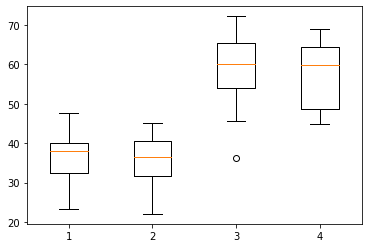

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_data)
plt.show()

## Line and Scatter Plots

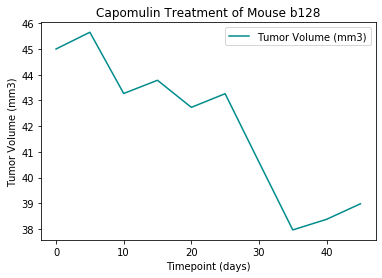

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_drug = mouse_clean.loc[:, "Drug Regimen"] == "Capomulin"
capomulin = mouse_clean.loc[capo_drug,:]
capo_drug = capomulin.loc[:, "Mouse ID"] == "b128"
mouse_b128 = capomulin.loc[capo_drug,:]

#lineplot
mouse_b128.plot("Timepoint", "Tumor Volume (mm3)", color = "darkcyan")
                
#plot formatting
plt.title("Capomulin Treatment of Mouse b128")     
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

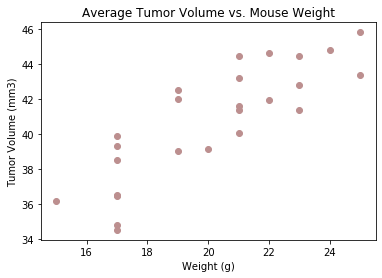

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_average = capomulin[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].groupby("Mouse ID").mean()

#scatter plot
plt.scatter(capo_average["Weight (g)"], capo_average["Tumor Volume (mm3)"], color = "rosybrown")

#plot formatting
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight")

plt.show()

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capo_average["Weight (g)"], capo_average["Tumor Volume (mm3)"])[0], 2)

print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

The correlation between mouse weight and the average tumor volume is 0.84
